# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

# url = "https://api.openweathermap.org/data/2.5/weather?"
# units = "metric"
# city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

# Define an empty list to fetch the weather data for each city
city_data = []
weather = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
        # lat={lat}&lon={lon}&exclude={part}&appid={API key}

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


  
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                      "Lat": city_lat, 
                      "Lng": city_lng, 
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | fort st. john
Processing Record 3 of Set 1 | manghit
Processing Record 4 of Set 1 | queenstown
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | ola
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | kamachumu
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | oualidia
City not found. Skipping...
Processing Record 12 of Set 1 | minas de marcona
Processing Record 13 of Set 1 | klyuchi
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | nemuro
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | bardai
Processing Record 18 of Set 1 | hirara
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | ust-nera
Processing Record 21 of Set 1 | vadso
Processing Record 22 of Set 1 | kartaly
Processing 

In [4]:
city_data

[{'City': 'ilulissat',
  'Lat': 69.2167,
  'Lng': -51.1,
  'Max Temp': -5.99,
  'Humidity': 53,
  'Cloudiness': 100,
  'Wind Speed': 10.8,
  'Country': 'GL',
  'Date': 1707279516},
 {'City': 'fort st. john',
  'Lat': 56.2499,
  'Lng': -120.8529,
  'Max Temp': -7.06,
  'Humidity': 79,
  'Cloudiness': 75,
  'Wind Speed': 1.03,
  'Country': 'CA',
  'Date': 1707279517},
 {'City': 'manghit',
  'Lat': 42.1156,
  'Lng': 60.0597,
  'Max Temp': 3.99,
  'Humidity': 57,
  'Cloudiness': 75,
  'Wind Speed': 6.27,
  'Country': 'UZ',
  'Date': 1707279351},
 {'City': 'queenstown',
  'Lat': -31.8976,
  'Lng': 26.8753,
  'Max Temp': 19.03,
  'Humidity': 52,
  'Cloudiness': 14,
  'Wind Speed': 1.56,
  'Country': 'ZA',
  'Date': 1707279518},
 {'City': 'yellowknife',
  'Lat': 62.456,
  'Lng': -114.3525,
  'Max Temp': -17.47,
  'Humidity': 85,
  'Cloudiness': 100,
  'Wind Speed': 5.66,
  'Country': 'CA',
  'Date': 1707279518},
 {'City': 'ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 12.81,
  'Humi

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ilulissat,69.2167,-51.1000,-5.99,53,100,10.80,GL,1707279516
1,fort st. john,56.2499,-120.8529,-7.06,79,75,1.03,CA,1707279517
2,manghit,42.1156,60.0597,3.99,57,75,6.27,UZ,1707279351
3,queenstown,-31.8976,26.8753,19.03,52,14,1.56,ZA,1707279518
4,yellowknife,62.4560,-114.3525,-17.47,85,100,5.66,CA,1707279518


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,-5.99,53,100,10.80,GL,1707279516
1,fort st. john,56.2499,-120.8529,-7.06,79,75,1.03,CA,1707279517
2,manghit,42.1156,60.0597,3.99,57,75,6.27,UZ,1707279351
3,queenstown,-31.8976,26.8753,19.03,52,14,1.56,ZA,1707279518
4,yellowknife,62.4560,-114.3525,-17.47,85,100,5.66,CA,1707279518


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

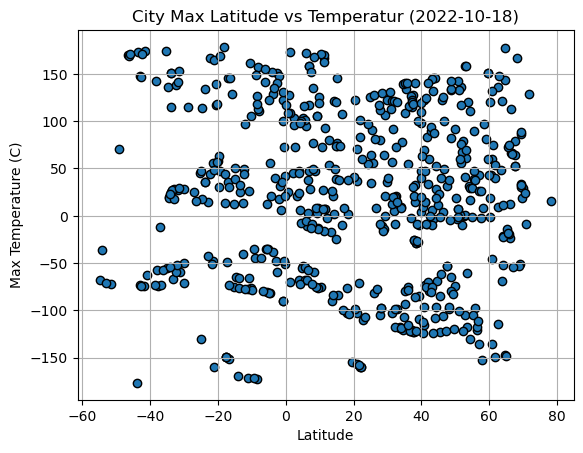

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Lng']
plt.scatter(x_values,y_values, marker='o',edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs Temperatur (2022-10-18)')

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

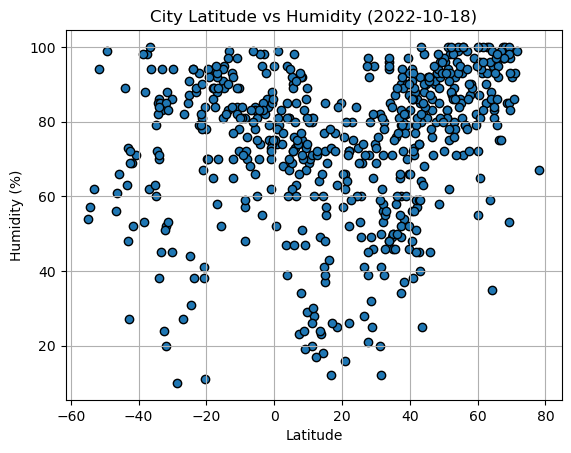

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, marker='o',edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (2022-10-18)')

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

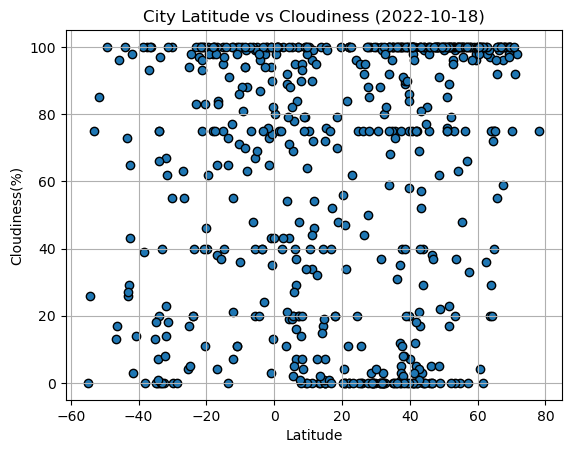

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, marker='o',edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs Cloudiness (2022-10-18)')

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

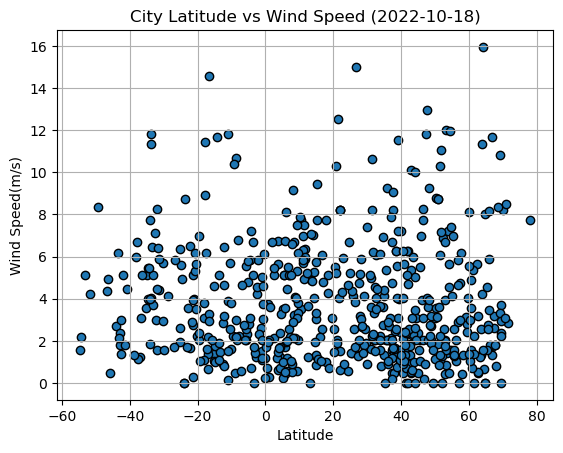

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, marker='o',edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Latitude vs Wind Speed (2022-10-18)')

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


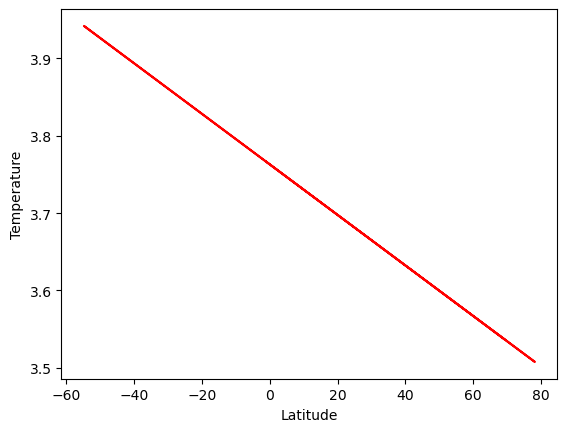

In [24]:
# Define a function to create Linear Regression plots
# line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# x_values = 
# y_values = 
# plt.scatter(x_values,y_values, marker='o',edgecolor='black')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
line = slope * x_values + intercept
plt.plot(x_values, line, color='red', label='Regression Line')

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat']>=0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,-5.99,53,100,10.80,GL,1707279516
1,fort st. john,56.2499,-120.8529,-7.06,79,75,1.03,CA,1707279517
2,manghit,42.1156,60.0597,3.99,57,75,6.27,UZ,1707279351
4,yellowknife,62.4560,-114.3525,-17.47,85,100,5.66,CA,1707279518
6,ola,59.5833,151.2833,-14.92,82,96,2.81,RU,1707279519


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat']<0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,queenstown,-31.8976,26.8753,19.03,52,14,1.56,ZA,1707279518
5,ushuaia,-54.8000,-68.3000,12.81,54,0,1.54,AR,1707279519
8,kamachumu,-1.6186,31.6200,17.17,79,73,1.36,TZ,1707279520
10,minas de marcona,-15.2119,-75.1103,19.57,91,95,4.61,PE,1707279521
12,west island,-12.1568,96.8225,29.99,70,21,4.63,CC,1707279522


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7890698954936064
y = -0.71x +32.38


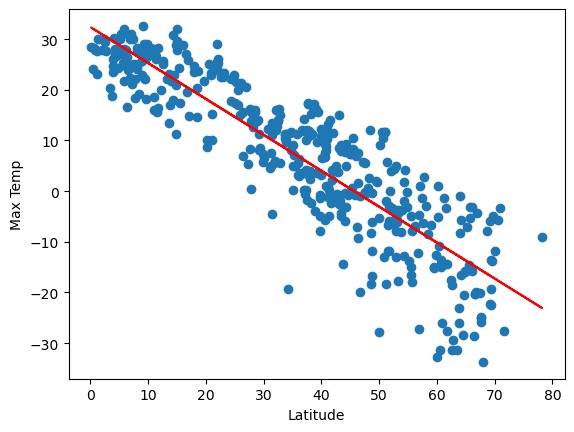

In [32]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.scatter(x_values,y_values, marker='o')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
line = slope * x_values + intercept
plt.plot(x_values, line, color='red', label='Regression Line')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

The r-value is: 0.2680460725024816
y = 0.21x +28.45


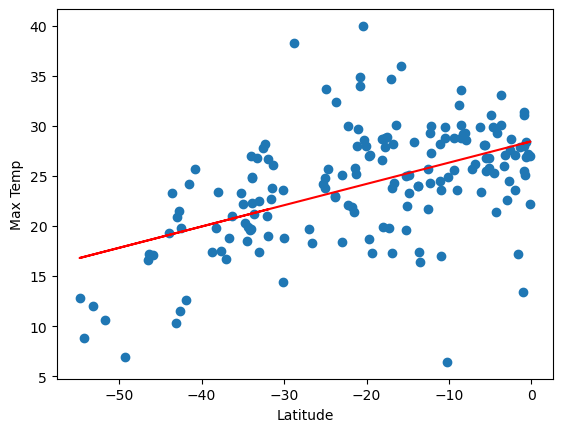

In [33]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.scatter(x_values,y_values, marker='o')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
line = slope * x_values + intercept
plt.plot(x_values, line, color='red', label='Regression Line')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1759654964492258
y = 0.43x +58.13


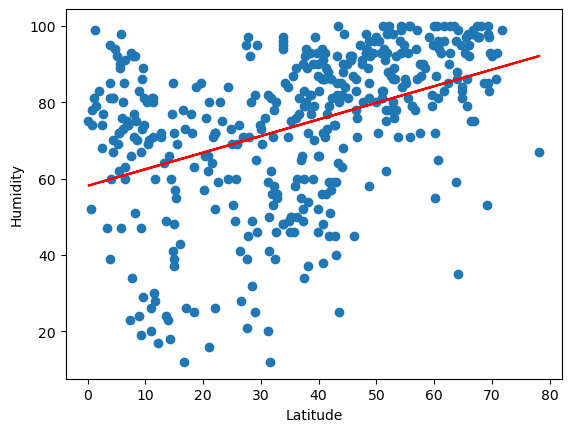

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.scatter(x_values,y_values, marker='o')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
line = slope * x_values + intercept
plt.plot(x_values, line, color='red', label='Regression Line')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq,(20,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

The r-value is: 0.06274780388871415
y = 0.33x +81.99


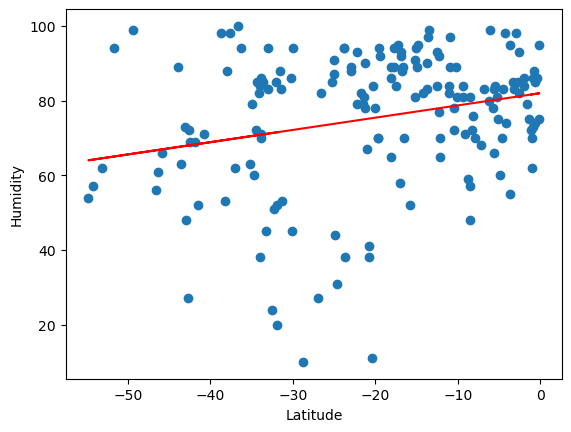

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.scatter(x_values,y_values, marker='o')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
line = slope * x_values + intercept
plt.plot(x_values, line, color='red', label='Regression Line')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq,(20,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07735546379512606
y = 0.57x +40.57


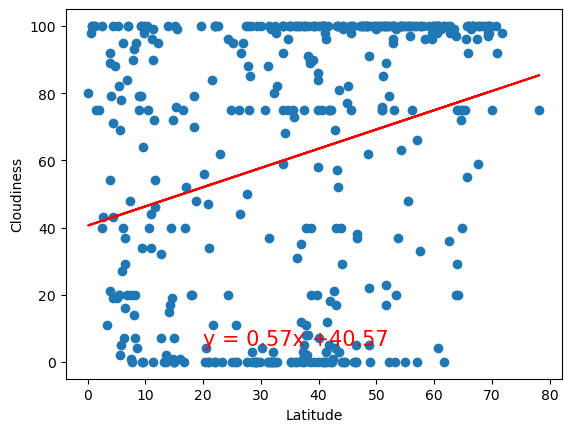

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values, marker='o')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
line = slope * x_values + intercept
plt.plot(x_values, line, color='red', label='Regression Line')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq,(20,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

The r-value is: 0.08211552037617995
y = 0.73x +77.35


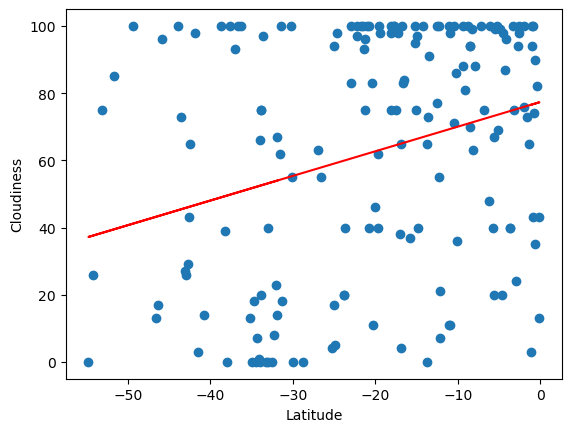

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values, marker='o')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
line = slope * x_values + intercept
plt.plot(x_values, line, color='red', label='Regression Line')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq,(20,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 8.94560555174185e-06
y = -0.0x +3.67


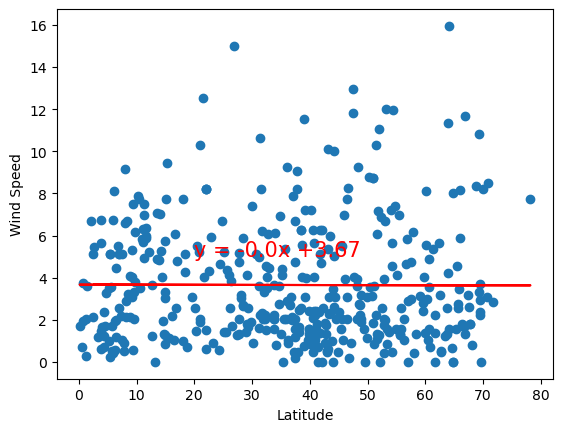

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values, marker='o')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
line = slope * x_values + intercept
plt.plot(x_values, line, color='red', label='Regression Line')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq,(20,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

The r-value is: 0.012956844105114702
y = -0.02x +3.37


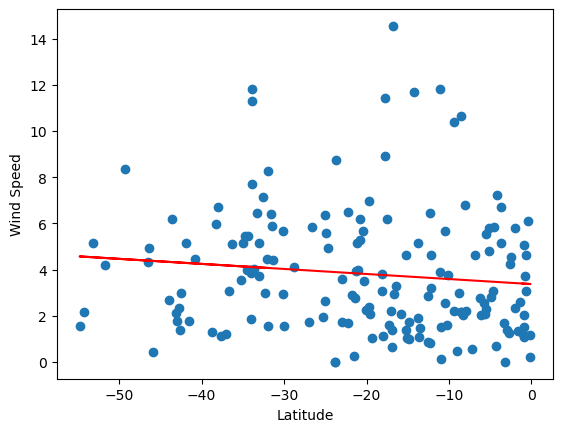

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values, marker='o')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
line = slope * x_values + intercept
plt.plot(x_values, line, color='red', label='Regression Line')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq,(20,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE